# 1. Basic Implementation of DBSCAN Using Scikit-Learn

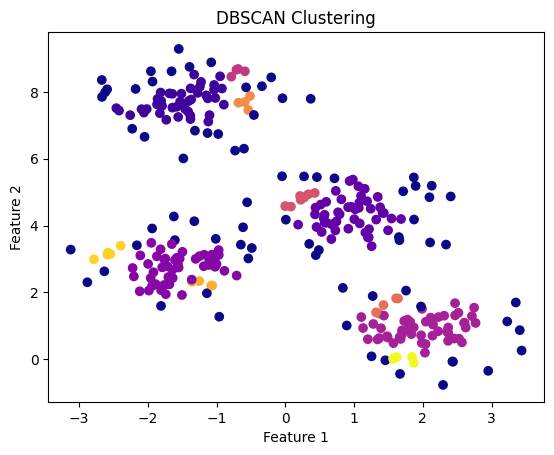

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 2. OPTICS Algorithm Using Scikit-Learn


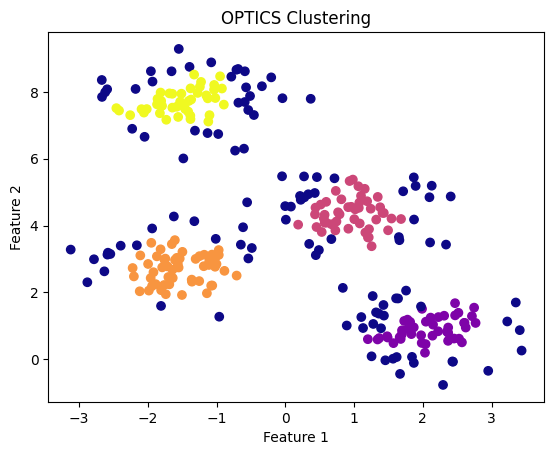

In [2]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Apply OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("OPTICS Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 3. HDBSCAN Implementation

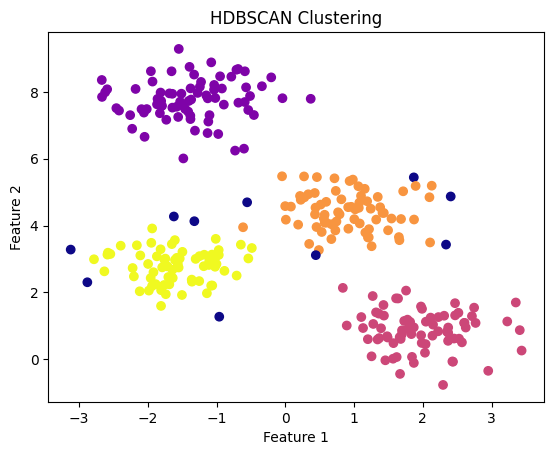

In [5]:
import hdbscan
import matplotlib.pyplot as plt

# Apply HDBSCAN
hdb = hdbscan.HDBSCAN(min_samples=5, min_cluster_size=10)
labels = hdb.fit_predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("HDBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# 4. Visualization of Epsilon Neighborhood

IndexError: arrays used as indices must be of integer (or boolean) type

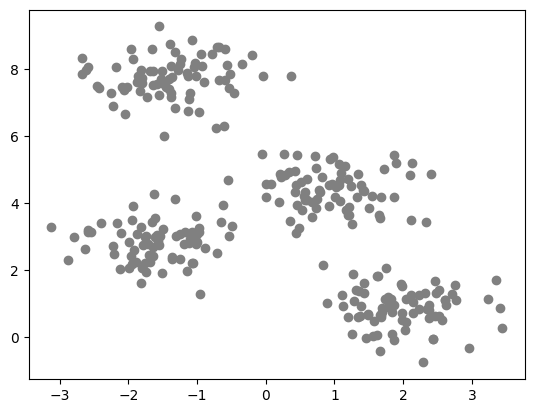

In [6]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Select a point
point = X[0].reshape(1, -1)

# Find neighbors within epsilon distance
neigh = NearestNeighbors(radius=0.3)
neigh.fit(X)
indices = neigh.radius_neighbors(point, return_distance=False)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c='gray')
plt.scatter(X[indices][0][:, 0], X[indices][0][:, 1], c='blue', label='Neighbors')
plt.scatter(point[:, 0], point[:, 1], c='red', label='Selected Point')
circle = plt.Circle(point[0], 0.3, color='blue', fill=False)
plt.gca().add_patch(circle)
plt.title("Epsilon Neighborhood Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


# 1. Homogeneity, Completeness, and V-Measure

In [7]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# Assuming you have true labels and predicted cluster labels
true_labels = [0, 0, 1, 1, 2, 2]
predicted_labels = [1, 1, 0, 0, 2, 2]

# Homogeneity
homogeneity = homogeneity_score(true_labels, predicted_labels)
print(f"Homogeneity: {homogeneity}")

# Completeness
completeness = completeness_score(true_labels, predicted_labels)
print(f"Completeness: {completeness}")

# V-Measure
v_measure = v_measure_score(true_labels, predicted_labels)
print(f"V-Measure: {v_measure}")


Homogeneity: 1.0
Completeness: 1.0
V-Measure: 1.0


# 2. Silhouette Coefficient


In [8]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
predicted_labels = kmeans.fit_predict(X)

# Silhouette Score (overall)
silhouette_avg = silhouette_score(X, predicted_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Silhouette Coefficient for each sample
silhouette_vals = silhouette_samples(X, predicted_labels)
print(f"Silhouette Coefficients for each sample: {silhouette_vals}")


Silhouette Score: 0.8757323158768271
Silhouette Coefficients for each sample: [0.83051019 0.88202551 0.87011802 0.81249676 0.92466487 0.93087112
 0.68957993 0.94678787 0.89985072 0.94320395 0.90113414 0.83565173
 0.84872478 0.8543155  0.89022525 0.879982   0.8642536  0.85750288
 0.86398297 0.79536705 0.87460891 0.78463004 0.91995475 0.80752693
 0.88501377 0.94469712 0.91427112 0.86420992 0.86933785 0.85880406
 0.94691354 0.83870223 0.83893322 0.82706238 0.94333045 0.94147515
 0.90643665 0.87036402 0.88141229 0.85329929 0.93657204 0.90611719
 0.88217685 0.84510256 0.80354137 0.89468739 0.92538954 0.90615609
 0.94133195 0.88300462 0.90405528 0.80128334 0.86928189 0.93946208
 0.85838906 0.85090145 0.87388179 0.84308335 0.93537876 0.82921811
 0.84188642 0.87507076 0.94268945 0.88017776 0.90042229 0.8953222
 0.91638532 0.76930863 0.9259677  0.94295002 0.89040139 0.93516644
 0.92384645 0.87219527 0.86807627 0.81368047 0.82871866 0.94282528
 0.92308661 0.78828719 0.93186694 0.91245364 0.93609

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 3. Davies-Bouldin Index

In [9]:
from sklearn.metrics import davies_bouldin_score

# Assuming you have the data X and predicted labels
db_index = davies_bouldin_score(X, predicted_labels)
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 0.17488462903692054


# 4. Contingency Matrix


In [11]:
from sklearn.metrics import confusion_matrix

# Assuming 'y' from your data generation is the true labels
true_labels = y

# Contingency Matrix
cont_matrix = confusion_matrix(true_labels, predicted_labels)
print("Contingency Matrix:")
print(cont_matrix)

Contingency Matrix:
[[125   0   0   0]
 [  0   0   0 125]
 [  0 125   0   0]
 [  0   0 125   0]]


# 5. Pair Confusion Matrix (and Derived Metrics)


In [12]:
from sklearn.metrics.cluster import pair_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Pair Confusion Matrix
tp, fp, tn, fn = pair_confusion_matrix(true_labels, predicted_labels).ravel()

# Derived Metrics
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f"Pair Confusion Matrix - TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Pair Confusion Matrix - TP: 187500, FP: 0, TN: 0, FN: 62000
Precision: 0.25
Recall: 0.25
F1 Score: 0.25
